In [6]:
import numpy
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

from keras.layers import Input

In [3]:
from tensorflow.keras.datasets import mnist  
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()


In [5]:
X_valid, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
1719/1719 [==============================] - 313s 181ms/step - loss: 0.5764 - accuracy: 0.8607 - val_loss: 0.2869 - val_accuracy: 0.9204
Epoch 2/20
1719/1719 [==============================] - 195s 113ms/step - loss: 0.2628 - accuracy: 0.9253 - val_loss: 0.2136 - val_accuracy: 0.9396
Epoch 3/20
1719/1719 [==============================] - 213s 124ms/step - loss: 0.2013 - accuracy: 0.9426 - val_loss: 0.1680 - val_accuracy: 0.9532
Epoch 4/20
1719/1719 [==============================] - 225s 131ms/step - loss: 0.1617 - accuracy: 0.9538 - val_loss: 0.1458 - val_accuracy: 0.9606
Epoch 5/20
1719/1719 [==============================] - 223s 130ms/step - loss: 0.1325 - accuracy: 0.9621 - val_loss: 0.1186 - val_accuracy: 0.9682
Epoch 6/20
1719/1719 [==============================] - 183s 106ms/step - loss: 0.1107 - accuracy: 0.9688 - val_loss: 0.1077 - val_accuracy: 0.9700
Epoch 7/20
1719/1719 [==============================] - 166s 97ms/step - loss: 0.0928 - accuracy: 0.9741 - val_l

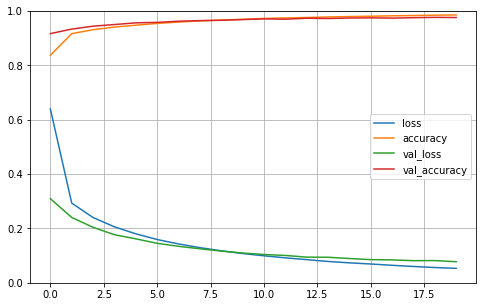

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [17]:
pd.DataFrame(history.history)


,loss,accuracy,val_loss,val_accuracy
0,0.639703,0.837036,0.309447,0.9168
1,0.293176,0.916618,0.240473,0.9334
2,0.240118,0.931309,0.204155,0.9442
3,0.205916,0.940818,0.176830,0.9502
4,0.180169,0.947764,0.161769,0.9564
5,0.159264,0.954273,0.145284,0.9582
6,0.142996,0.959255,0.134210,0.9624
7,0.129330,0.963491,0.125120,0.9646
8,0.117728,0.966964,0.116744,0.9658
9,0.107682,0.969400,0.109500,0.9684


In [18]:

input_ = keras.layers.Input(shape=[28, 28])
flatten = keras.layers.Flatten(input_shape=[28, 28])(input_)
hidden1 = keras.layers.Dense(2**14, activation="relu")(flatten)
hidden2 = keras.layers.Dense(512, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(28*28, activation='relu')(hidden2)
reshap = keras.layers.Reshape((28, 28))(hidden3)
concat_ = keras.layers.Concatenate()([input_, reshap])
flatten2 = keras.layers.Flatten(input_shape=[28, 28])(concat_)
output = keras.layers.Dense(10, activation='softmax')(flatten2)
model = keras.Model(inputs=[input_], outputs=[output] )

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 16384)        12861440    flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 512)          8389120     dense_3[0][0]                    
______________________________________________________________________________________________

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()